<a href="https://colab.research.google.com/github/Danieltandrade/Metricas_de_Avaliacao_de_Desempenho/blob/main/Metrica_Avaliacao_de_Desempenho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Métricas de Avaliação de Desempenho

## Importando Bibliotecas
Essa configuração inicial prepara as ferramentas essenciais para:
1. Carregar e manipular os dados.
2. Processar texto para uso em aprendizado de máquina.
3. Treinar e avaliar um modelo de classificação.
4. Visualizar resultados, permitindo melhor interpretação das métricas.

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## Realizando Download
Esse trecho do código é responsável por baixar o dataset do Kaggle e organizar os arquivos para que estejam disponíveis no ambiente de trabalho no Google Colab.

In [ ]:
# Download última versão
path = kagglehub.dataset_download("ashfakyeafi/spam-email-classification")

# Cria uma pasta chamda "dataset" armazena o arquivo "email.csv" nesta pasta
!cp -r /root/.cache/kagglehub/datasets/ashfakyeafi/spam-email-classification/versions/3 /content/dataset

100%|██████████| 207k/207k [00:00<00:00, 22.8MB/s]

Extracting files...


## Manipulando Dataset


### Tratamento inicial
Esse trecho do código começa realizando o carregamento do dataset no formato CSV e exibe as primeiras linhas para inspecionar os dados.
Posteriormente verifica a distribuição dos valores únicos na coluna Category.

In [ ]:
df = pd.read_csv("/content/dataset/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Verificando valores únicos na coluna de categorias
print("Valores únicos na coluna de categorias:")
print(df['Category'].value_counts())

Valores únicos na coluna de categorias:
Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


### Verificando inconsistência
O comando fornecido está verificando as linhas em que o valor na coluna __Category__ é igual à string '{"mode":"full"}'. Aqui foi verificado que há um erro no final do dataset, mas que será descartado na análise.


In [ ]:
print(df[df['Category'] == '{"mode":"full"}'])

Empty DataFrame
Columns: [Category, Message]
Index: []


### Renomenado Colunas
Esse trecho de código renomeia as colunas para maior clareza, padroniza os rótulos para valores numéricos e separa os dados em variáveis independentes (as mensagens) e dependentes (os rótulos).

In [ ]:
# Renomendo colunas para melhor entendimento
df.rename(columns={'Category': 'Label', 'Message': 'Message'}, inplace=True)

# Mapeando os rótulos 'Label' para manter consistência (ham = 0, spam = 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Separando os recursos(mensagens) (X) e rótulos(label) (y)
X = df['Message']
y = df['Label']

## Dados de Treinamento

### Preparando Dados de Treinamento
Esse trecho de código divide o conjunto de dados em conjuntos de treinamento e teste, sendo uma etapa crucial no pipeline de machine learning.
Em seguida o trecho de código realiza dois passos importantes no pipeline de machine learning: vetorização do texto com TF-IDF e verificação de valores ausentes no conjunto de rótulos de treinamento. Aqui é notado um valor ausente que deverá ser tratado.

In [ ]:
# Dividindo os dados em 80% para treinamento e 20% para teste (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convertendo textos em vetores com TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Verifica se existe valores ausentes no conjunto de treinamento Label(y_train)
print(y_train.isnull().sum())

1


### Tratando valor ausente
Este trecho trata valores ausentes, refaz a divisão dos dados e verifica os valores únicos na coluna __Label__.

In [ ]:
# Preencher Valores Ausentes na Coluna "Label"
df['Label'] = df['Label'].fillna(0)

# Após tratamente, os dados são separados novamente em conjuntos de treinamento e teste.
X = df['Message']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando valores únicos na coluna "Label"
print(df['Label'].unique())

[0. 1.]


## Treinando e Testando Modelo de Machine Learning
Instanciando e treinando o modelo Naive Bayes para a classificação de e-mails como "spam" ou "não spam".

### Treinando Modelo
Este é um modelo de Naive Bayes multinomial, adequado para tarefas de classificação de texto (como a classificação de e-mails em spam ou não spam).

In [ ]:
# Instanciando o modelo Naive Bayes e realizando o treinamento
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

### Realizando Teste
Este código realiza o teste do Modelo nos dados de teste separados anteriormente.

In [ ]:
# Realizando teste com dados do conjunto de teste
y_pred_nb = nb_model.predict(X_test_vec)

## Avaliando Desempenho do Modelo
Nos próximos trechos de código inciaremos a avaliação do modelo de machine learning, explorando métricas como Matriz de Confusão, Acurácia, Precisão, Sensibilidade, Especificidade, F1-Score e Curva de ROC.

### Matriz de Confusão
Neste trecho de código, foi calculado a Matriz de Confusão e visualizando-a com um gráfico de heatmap.

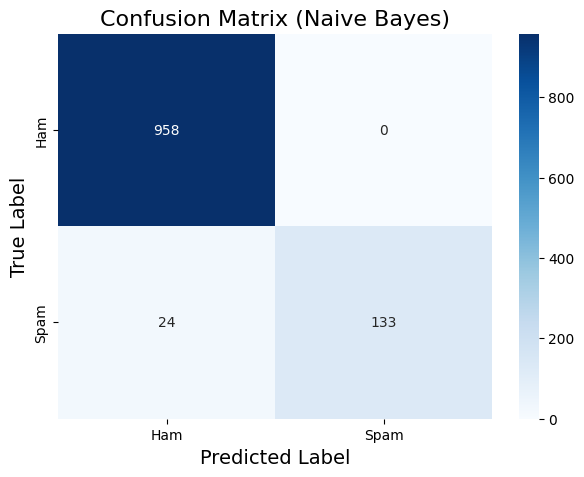

In [ ]:
# Calculando matriz de confusão
cm = confusion_matrix(y_test, y_pred_nb)

# Criando gráfico da matriz de confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Naive Bayes)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

### Métricas de Avaliação
1. No primeiro trecho de código, foi extraido os valores da matriz de confusão para calcular métricas de avaliação.
2. O segundo trecho de código está realizando o cálculo das métricas de avaliação com base nos valores extraídos da matriz de confusão.
3. Por último, o trecho de código, está calculando e plotando a Curva ROC para avaliar o desempenho do modelo de classificação.

In [ ]:
"""
Verdadeiro Positivo = VP
Verdadeiro Negativo = VN
Falso Positivo = FP
Falso Negativo = FN
Total elementos conjunto de teste = NT
"""
# Extrair os valores
VN, FP = cm[0]
FN, VP = cm[1]

# Total de exemplos no conjunto de teste
NT = len(y_test)

# Exibir os valores
print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Total do conjunto de teste: {NT}")

Verdadeiros Positivos (VP): 133
Verdadeiros Negativos (VN): 958
Falsos Positivos (FP): 0
Falsos Negativos (FN): 24
Total do conjunto de teste: 1115


In [ ]:
# Cálculos matemáticos
acuracia = (VP + VN)/NT
sensibilidade = VP/(VP + FN)
especificidade = VN/(FP + VN)
precisao = VP/(VP + FP)
f1score = 2*((precisao * sensibilidade)/(precisao + sensibilidade))

print(f"Valor da Acurácia: {acuracia:.2f}")
print(f"Valor da Sensibilidade(Recall): {sensibilidade:.2f}")
print(f"Valor da Especificidade: {especificidade:.2f}")
print(f"Valor da Precisão: {precisao:.2f}")
print(f"Valor de F1Score: {f1score:.2f}")

Valor da Acurácia: 0.98
Valor da Sensibilidade(Recall): 0.85
Valor da Especificidade: 1.00
Valor da Precisão: 1.00
Valor de F1Score: 0.92


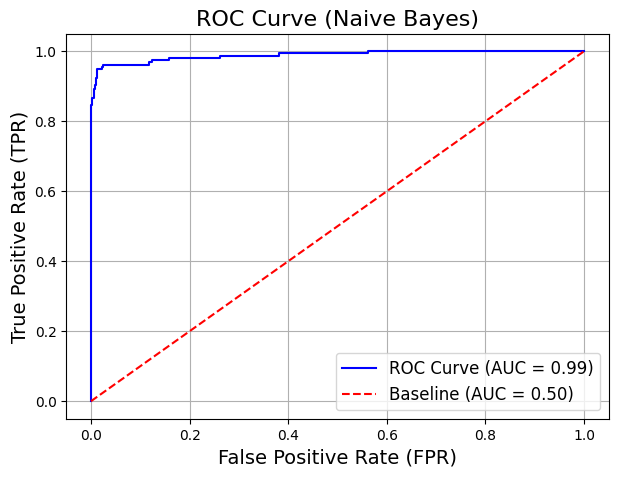

In [ ]:
# Obtendo as probabilidades preditas pelo modelo (para a classe positiva - spam)
y_pred_prob = nb_model.predict_proba(X_test_vec)[:, 1]

# Calculando a TPR, FPR e os limiares
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculando a AUC (Área Sob a Curva)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plotando a Curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve (Naive Bayes)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()